In [2]:
import numpy as np
import pandas as pd
import kagglehub
import os
import matplotlib.pyplot as plt
from sklearn.utils import resample
import re

In [3]:
#Step -1 load the data
print(f"Amazon fine food reviews data set")
path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")
csv_file = os.path.join(path, "Reviews.csv")
df = pd.read_csv(csv_file)

Amazon fine food reviews data set


In [4]:
df.head(2) # 1-2-3-4-5. review-
#df['Score'].value_counts()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [5]:
#eda  - inves
df.shape
df.columns.to_list()

['Id',
 'ProductId',
 'UserId',
 'ProfileName',
 'HelpfulnessNumerator',
 'HelpfulnessDenominator',
 'Score',
 'Time',
 'Summary',
 'Text']

In [6]:
#EDa
print(f"Total Reviews : {len(df)}")
df.info()
df.isnull().sum()

Total Reviews : 568454
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [7]:
df_clean = df[['Text','Score']].dropna()
print(df_clean.head(2))
print(f"After Cleaning data: {len(df_clean)}")

                                                Text  Score
0  I have bought several of the Vitality canned d...      5
1  Product arrived labeled as Jumbo Salted Peanut...      1
After Cleaning data: 568454


In [8]:
print("rating diistribution")
score_counts= df_clean['Score'].value_counts().sort_index()
print(score_counts)

rating diistribution
Score
1     52268
2     29769
3     42640
4     80655
5    363122
Name: count, dtype: int64


In [9]:
print("Percentages")
for score,count in score_counts.items():
    percentage = (count/len(df_clean))*100
    print(f"{score} star: {percentage: .2f}%")

Percentages
1 star:  9.19%
2 star:  5.24%
3 star:  7.50%
4 star:  14.19%
5 star:  63.88%


In [10]:
# 1 Star, 2 star, 3 star
print("Sample review analysis")
for score in [1,2,3,4,5]:
    sample_review= df_clean[df_clean['Score']==score]['Text'].iloc[0]
    print(f"{score}-Star Review")
    print(f"{sample_review[:200]}")

Sample review analysis
1-Star Review
Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
2-Star Review
If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor
3-Star Review
This seems a little more wholesome than some of the supermarket brands, but it is somewhat mushy and doesn't have quite as much flavor either.  It didn't pass muster with my kids, so I probably won't 
4-Star Review
This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powd
5-Star Review
I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The

In [11]:
df_clean['text_length'] = df_clean['Text'].str.len()
df_clean['word_count'] = df_clean['Text'].str.split().str.len()

In [12]:
df_clean

,Text,Score,text_length,word_count
0,I have bought several of the Vitality canned d...,5,263,48
1,Product arrived labeled as Jumbo Salted Peanut...,1,190,31
2,This is a confection that has been around a fe...,4,509,94
3,If you are looking for the secret ingredient i...,2,219,41
4,Great taffy at a great price. There was a wid...,5,140,27
...,...,...,...,...
568449,Great for sesame chicken..this is a good if no...,5,149,26
568450,I'm disappointed with the flavor. The chocolat...,2,252,46
568451,"These stars are small, so you can give 10-15 o...",5,372,66
568452,These are the BEST treats for training and rew...,5,200,35


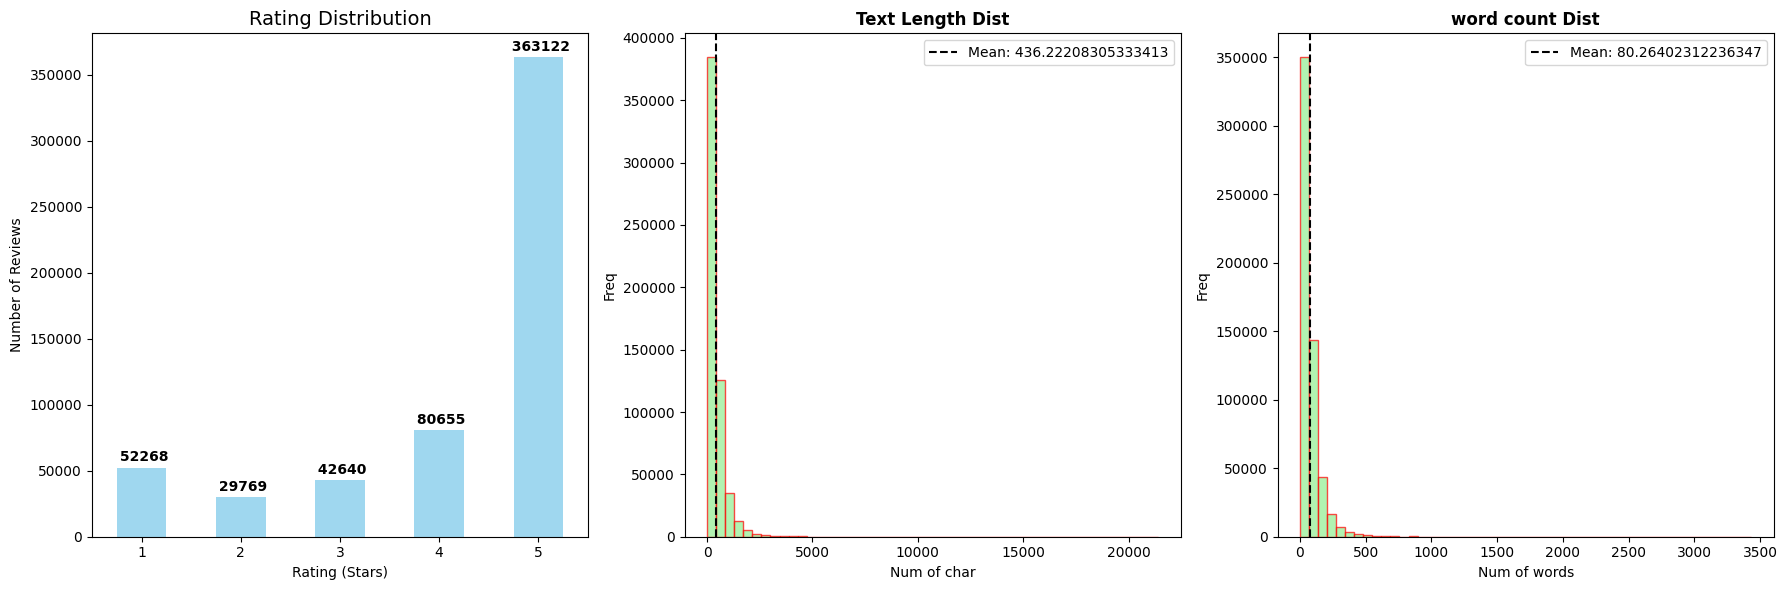

In [13]:
#sizing the canvas
plt.figure(figsize=(18,6))

#plot-1 Rating distribbution
plt.subplot(1,3,1)
score_counts.plot(kind='bar',color='skyblue',alpha=0.8)
plt.title("Rating Distribution",fontsize=14)
plt.xlabel("Rating (Stars)")
plt.xticks(rotation=0)
plt.ylabel("Number of Reviews")
for idx, val in enumerate(score_counts.values):
  plt.text(idx,val+5000, f"{val: }", ha='center',fontweight='bold')

#plot-2 text length dist
plt.subplot(1,3,2)
plt.hist(df_clean['text_length'], bins=50, alpha=0.7, color='lightgreen', edgecolor='red')
plt.title("Text Length Dist",fontweight='bold')
plt.xlabel("Num of char")
plt.ylabel("Freq")
plt.axvline(df_clean['text_length'].mean(), color='black',linestyle="--",
            label=f"Mean: {df_clean['text_length'].mean()}")
plt.legend()

#plot-3 word count dist
plt.subplot(1,3,3)
plt.hist(df_clean['word_count'], bins=50, alpha=0.7, color='lightgreen', edgecolor='red')
plt.title("word count Dist",fontweight='bold')
plt.xlabel("Num of words")
plt.ylabel("Freq")
plt.axvline(df_clean['word_count'].mean(), color='black',linestyle="--",
            label=f"Mean: {df_clean['word_count'].mean()}")
plt.legend()

plt.tight_layout()

In [14]:
df_clean.head(2)

,Text,Score,text_length,word_count
0,I have bought several of the Vitality canned d...,5,263,48
1,Product arrived labeled as Jumbo Salted Peanut...,1,190,31


In [15]:
#convert the problem statement to binary classification problem
#->any review which is 1 or 2 that is negative, 3 is neutral, 4 5 are positive
df_binary = df_clean[df_clean['Score'] !=3].copy()
df_binary

,Text,Score,text_length,word_count
0,I have bought several of the Vitality canned d...,5,263,48
1,Product arrived labeled as Jumbo Salted Peanut...,1,190,31
2,This is a confection that has been around a fe...,4,509,94
3,If you are looking for the secret ingredient i...,2,219,41
4,Great taffy at a great price. There was a wid...,5,140,27
...,...,...,...,...
568449,Great for sesame chicken..this is a good if no...,5,149,26
568450,I'm disappointed with the flavor. The chocolat...,2,252,46
568451,"These stars are small, so you can give 10-15 o...",5,372,66
568452,These are the BEST treats for training and rew...,5,200,35


In [16]:
df_binary['sentiment'] = (df_binary['Score'] >=4).astype(int)

In [17]:
df_binary

,Text,Score,text_length,word_count,sentiment
0,I have bought several of the Vitality canned d...,5,263,48,1
1,Product arrived labeled as Jumbo Salted Peanut...,1,190,31,0
2,This is a confection that has been around a fe...,4,509,94,1
3,If you are looking for the secret ingredient i...,2,219,41,0
4,Great taffy at a great price. There was a wid...,5,140,27,1
...,...,...,...,...,...
568449,Great for sesame chicken..this is a good if no...,5,149,26,1
568450,I'm disappointed with the flavor. The chocolat...,2,252,46,0
568451,"These stars are small, so you can give 10-15 o...",5,372,66,1
568452,These are the BEST treats for training and rew...,5,200,35,1


In [18]:
#distribution
print(f"Negative (1-2 star): {sum(df_binary['sentiment']==0):,}")
print(f"Positive (4-5 star): {sum(df_binary['sentiment']==1):,}")

Negative (1-2 star): 82,037
Positive (4-5 star): 443,777


In [19]:
#check imbalance
negative_pct= (sum(df_binary['sentiment']==0)/len(df_binary))*100
positive_pct= (sum(df_binary['sentiment']==1)/len(df_binary))*100
print(f"negative_pct: {negative_pct}")
print(f"positive_pct: {positive_pct}")

if positive_pct>70:
    print(f"data is highly skewed towards positive reviews")

negative_pct: 15.601904856089796
positive_pct: 84.3980951439102
data is highly skewed towards positive reviews


In [20]:
df_binary

,Text,Score,text_length,word_count,sentiment
0,I have bought several of the Vitality canned d...,5,263,48,1
1,Product arrived labeled as Jumbo Salted Peanut...,1,190,31,0
2,This is a confection that has been around a fe...,4,509,94,1
3,If you are looking for the secret ingredient i...,2,219,41,0
4,Great taffy at a great price. There was a wid...,5,140,27,1
...,...,...,...,...,...
568449,Great for sesame chicken..this is a good if no...,5,149,26,1
568450,I'm disappointed with the flavor. The chocolat...,2,252,46,0
568451,"These stars are small, so you can give 10-15 o...",5,372,66,1
568452,These are the BEST treats for training and rew...,5,200,35,1


In [21]:
#handle imbalance
from sklearn.utils import resample
negative_reviews= df_binary[df_binary['sentiment']==0]
positive_reviews= df_binary[df_binary['sentiment']==1] 

print(f"Original imbalance")
print(f"Negative: {len(negative_reviews):,} ({len(negative_reviews)/len(df_binary)*100})" )
print(f"Positive: {len(positive_reviews):,} ({len(positive_reviews)/len(df_binary)*100})" )

Original imbalance
Negative: 82,037 (15.601904856089796)
Positive: 443,777 (84.3980951439102)


**UNDERSAMPLING**

In [23]:
#we are going to undersample the majority class to match the minority class
n_minority= len(negative_reviews)

positive_downsampled = resample(positive_reviews,
                               replace=False, #sample without replacement
                               n_samples=n_minority,
                               random_state=21)

#df_balanced
df_balanced= pd.concat([negative_reviews, positive_downsampled])

df_balanced

,Text,Score,text_length,word_count,sentiment
1,Product arrived labeled as Jumbo Salted Peanut...,1,190,31,0
3,If you are looking for the secret ingredient i...,2,219,41,0
12,My cats have been happily eating Felidae Plati...,1,399,79,0
16,I love eating them and they are good for watch...,2,195,42,0
26,"The candy is just red , No flavor . Just plan...",1,88,20,0
...,...,...,...,...,...
58341,Love to make Apple pies out of this product bu...,4,127,25,1
347959,Our vet recommends them to help keep our puppy...,5,174,31,1
498846,I love Planters Mixed nuts! I gave them up bec...,5,171,36,1
390538,I had never tried Coffee Bean & Tea Leaf befor...,5,758,149,1


In [24]:
#shuffle
df_balanced= df_balanced.sample(frac=1,random_state=21).reset_index(drop=True)
#frac= 1 is reshuffle 100 percent of data, this reshuffle is in order reshuffle, this is required bcoz concat gives evverything in prder which is why shuffling needed
df_balanced


,Text,Score,text_length,word_count,sentiment
0,Our family now uses this in place of butter or...,5,323,65,1
1,the k- cups were thrown in an oversized box wi...,1,208,41,0
2,I usually go to China town whereever I happen ...,5,270,54,1
3,"Used to buy them from Sam's Club, but they wer...",5,151,28,1
4,"Great product, great price from amazon while u...",5,135,20,1
...,...,...,...,...,...
164069,I works fine but unless you are a commercial p...,2,244,43,0
164070,"First, the other happy baby flavors have been ...",1,390,74,0
164071,"We like all of the Crystal Light mixes, but fi...",5,308,58,1
164072,VERY Disappointing --- doesn't taste like coff...,1,148,28,0


In [25]:
#seperations
negative_reviews = df_binary[df_binary['sentiment'] == 0]
positive_reviews = df_binary[df_binary['sentiment'] == 1]

print(f"Original Imbalance")
print(f"Negative : {len(negative_reviews):,} ({len(negative_reviews)/len(df_binary)})")
print(f"Positive : {len(positive_reviews):,} ({len(positive_reviews)/len(df_binary)})")



print(f"After balance")
print(f"Total Samples : {len(df_balanced)}")
print(f"Negative : {sum(df_balanced['sentiment'] == 0):,} ({sum(df_balanced['sentiment']==0)/len(df_balanced)**100})")
print(f"Positive : {sum(df_balanced['sentiment'] == 1):,} ({sum(df_balanced['sentiment']==1)/len(df_balanced)**100})")

Original Imbalance
Negative : 82,037 (0.15601904856089796)
Positive : 443,777 (0.843980951439102)
After balance
Total Samples : 164074
Negative : 82,037 (0.0)
Positive : 82,037 (0.0)


In [26]:
#take a sample from df_balanced now so that load will be less on our gpu
sample_size= min(50000,len(df_balanced))
df_sample = df_balanced.sample(n=sample_size,random_state=21)

sample_negative= sum(df_sample['sentiment']==0)
sample_positive= sum(df_sample['sentiment']==1)
print(f"sample_negative : {sample_negative}")
print(f"sample_positive : {sample_positive}")

sample_negative : 25061
sample_positive : 24939


In [27]:
#clean - text -> 1) convert lowercase
                #  2) remove special character :) (U+1F60A).  #, !
                #  3) keep only letter and spaces
                #  4) extra whitespcae   i_love__ice-cream

In [28]:
import re

def clean_text(text):
    text=text.lower()
    #remove all the special characters 
    text = re.sub(r'[^a-zA-Z\s]','', text)
    text= ' '.join(text.split())
    return text

print("+++++++++++++++++text preprocessing++++++++++++++++")
df_balanced['clean_text']= df_balanced['Text'].apply(clean_text)

+++++++++++++++++text preprocessing++++++++++++++++


In [29]:
df_balanced

,Text,Score,text_length,word_count,sentiment,clean_text
0,Our family now uses this in place of butter or...,5,323,65,1,our family now uses this in place of butter or...
1,the k- cups were thrown in an oversized box wi...,1,208,41,0,the k cups were thrown in an oversized box wit...
2,I usually go to China town whereever I happen ...,5,270,54,1,i usually go to china town whereever i happen ...
3,"Used to buy them from Sam's Club, but they wer...",5,151,28,1,used to buy them from sams club but they were ...
4,"Great product, great price from amazon while u...",5,135,20,1,great product great price from amazon while us...
...,...,...,...,...,...,...
164069,I works fine but unless you are a commercial p...,2,244,43,0,i works fine but unless you are a commercial p...
164070,"First, the other happy baby flavors have been ...",1,390,74,0,first the other happy baby flavors have been a...
164071,"We like all of the Crystal Light mixes, but fi...",5,308,58,1,we like all of the crystal light mixes but fin...
164072,VERY Disappointing --- doesn't taste like coff...,1,148,28,0,very disappointing doesnt taste like coffee an...


**TOKENIZATION**

In [31]:
#to build rnn or lstm , firstly we need to have max features, which is like a vocabulary which is created
MAX_FEATURES=10000 
MAX_LEN = 100 #max seq length (number of words per review)

print(f"Max vocab size : {MAX_FEATURES} words")
print(f"Max seq Length : {MAX_LEN} words")

Max vocab size : 10000 words
Max seq Length : 100 words


In [32]:
x= df_balanced['clean_text'].values
y=df_balanced['sentiment'].values

In [33]:
x

array(['our family now uses this in place of butter or other oils for all our cooking needs it tastes sooo good it has a very nice lite sweet taste to it also it is much healthier for you than butter or other oils we use all clad cookware and have no trouble with sticking as long as adequate coconut oil is used when cooking',
       'the k cups were thrown in an oversized box with no packaging i only recevied out of several were dented in and i got green mnt decafe coffees also the rest were mostly tea what a rip off',
       'i usually go to china town whereever i happen to be and stock up the product itself is fantastic but i usually dont pay more than for oz exactly the same tea if you dont have access to china town then by all means it pays to get it however you can',
       ...,
       'we like all of the crystal light mixes but find the raspberry tea to be the best tasting of all of them being diabetic i am always looking for sugar free products that taste good but the true test 

In [34]:
y

array([1, 0, 1, ..., 1, 0, 0])

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer= Tokenizer(num_words= MAX_FEATURES, oov_token='<OOV>') #when a model hasnt seen a particular word or data but it comes in the working, so just dont give just error then, rather provide with out of vocab token
tokenizer.fit_on_texts(x)  # creates word frequency,how many times a particular word is appearing, the count of it is shown
#by default any oov token is given index 0 in pytorch, and  1 in tensorflow


#converting the text into sequnces
x_sequences= tokenizer.texts_to_sequences(x) #converts each word to coresponding index value, mtlb jo freuqency hogi na uski vahi index aajayegi niklke, ab jo index aayegi they will come out as a  list

#PADDING
from tensorflow.keras.preprocessing.sequence import pad_sequences 
x_padded = pad_sequences(x_sequences, maxlen= MAX_LEN, padding='post',truncating='post')


print(f"Actual vocab size: {len(tokenizer.word_index):,}words")
print(f"Final Sequence shape : {x_padded.shape}")

#look at the final data
print(f"Org Text : {x[0][:100]}")
print(f"Sequence : {x_sequences[0][:20]}")
print(f"Padded shape: {x_padded[0].shape}")

Actual vocab size: 113,343words
Final Sequence shape : (164074, 100)
Org Text : our family now uses this in place of butter or other oils for all our cooking needs it tastes sooo g
Sequence : [118, 380, 93, 1000, 9, 11, 613, 8, 301, 36, 59, 1086, 12, 41, 118, 657, 709, 7, 129, 3126]
Padded shape: (100,)


In [36]:
x_sequences[0]

[118,
 380,
 93,
 1000,
 9,
 11,
 613,
 8,
 301,
 36,
 59,
 1086,
 12,
 41,
 118,
 657,
 709,
 7,
 129,
 3126,
 37,
 7,
 53,
 5,
 39,
 195,
 4215,
 139,
 32,
 6,
 7,
 83,
 7,
 10,
 73,
 840,
 12,
 20,
 62,
 301,
 36,
 59,
 1086,
 51,
 92,
 41,
 1,
 1,
 4,
 18,
 58,
 1162,
 19,
 1862,
 25,
 244,
 25,
 3701,
 303,
 230,
 10,
 117,
 46,
 657]

In [37]:
x_padded[0]

array([ 118,  380,   93, 1000,    9,   11,  613,    8,  301,   36,   59,
       1086,   12,   41,  118,  657,  709,    7,  129, 3126,   37,    7,
         53,    5,   39,  195, 4215,  139,   32,    6,    7,   83,    7,
         10,   73,  840,   12,   20,   62,  301,   36,   59, 1086,   51,
         92,   41,    1,    1,    4,   18,   58, 1162,   19, 1862,   25,
        244,   25, 3701,  303,  230,   10,  117,   46,  657,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0])

In [38]:
#split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_padded,y,
                                                test_size=0.20,
                                                random_state=42,
                                                stratify=y)#maintain the class balance overall


print(f"Training Set: {x_train.shape[0]:,} samples")
print(f"Testing Set:{x_test.shape[0]:,} samples")
print(f"shape of features:{x_train.shape[1]} (sequ length)")

Training Set: 131,259 samples
Testing Set:32,815 samples
shape of features:100 (sequ length)


**RNN**

In [40]:
from tensorflow.keras.layers import Embedding, SimpleRNN,LSTM,Dropout,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.models import Sequential

In [81]:
def create_rnn_model():
    model=Sequential([
        Embedding(input_dim = MAX_FEATURES,output_dim=128,input_length=MAX_LEN),
        SimpleRNN(units=64,return_sequences=False), #hidden state size of 64, toh mtlb after every dense vector token reading, ye 64 value of the hidden state will be updated
        Dropout(0.5),
        Dense(32,activation='relu'), #toph yha pe jo 64 dim ka input aayega, vo input harr ek 32 neuron ke saath connect hoga, weights aur bias lgaayenge, aur phir harr ek neuron dega ek output, toh yaani 32 times 64input ki mappping will give 32 as the output
        Dense(1,activation='sigmoid')
    ])
    return model
    
# Dense layer ka core kaam hai:
# Matrix multiply karna input aur weight matrix ka
# Bias add karna
# Activation lagana

rnn_model=create_rnn_model()

rnn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

rnn_model.summary()

C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [85]:
rnn_history= rnn_model.fit(x_train,y_train,
                           batch_size=128,
                           epochs=5,
                           validation_split=0.20,
                           verbose=1)

Epoch 1/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 86s 97ms/step - accuracy: 0.5161 - loss: 0.6931 - val_accuracy: 0.5463 - val_loss: 0.6797
Epoch 2/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 77s 94ms/step - accuracy: 0.5593 - loss: 0.6695 - val_accuracy: 0.5553 - val_loss: 0.6682
Epoch 3/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 69s 78ms/step - accuracy: 0.5917 - loss: 0.6232 - val_accuracy: 0.5511 - val_loss: 0.6855
Epoch 4/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 58s 70ms/step - accuracy: 0.6144 - loss: 0.5819 - val_accuracy: 0.5590 - val_loss: 0.7094
Epoch 5/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 50s 61ms/step - accuracy: 0.6329 - loss: 0.5417 - val_accuracy: 0.5674 - val_loss: 0.7571


In [87]:
#to print the final accuracy
final_train_accuracy= rnn_history.history['accuracy'][-1]
print(f"final_train_accuracy :{final_train_accuracy}")

final_train_accuracy :0.6319959759712219


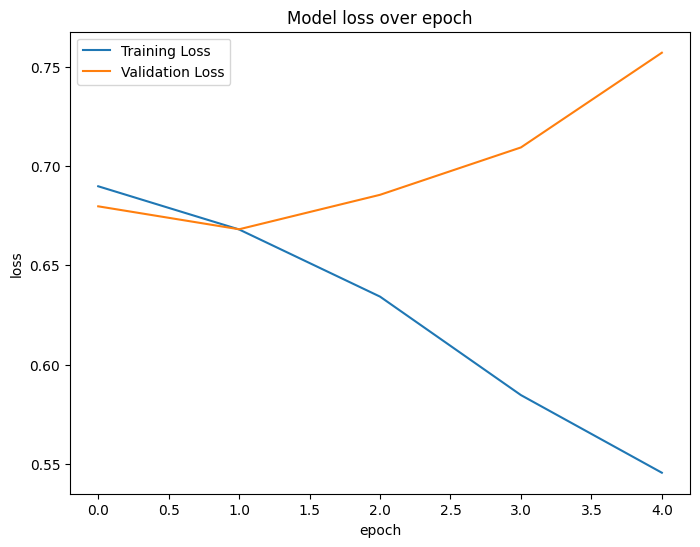

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(rnn_history.history['loss'],label='Training Loss')
plt.plot(rnn_history.history['val_loss'],label= 'Validation Loss')
plt.title('Model loss over epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [93]:
def create_lstm_model():
    model=Sequential([
        Embedding(input_dim = MAX_FEATURES,output_dim=128,input_length=MAX_LEN),
        LSTM(units=64,return_sequences=False), #hidden state size of 64, toh mtlb after every dense vector token reading, ye 64 value of the hidden state will be updated
        Dropout(0.5),
        Dense(32,activation='relu'), #toph yha pe jo 64 dim ka input aayega, vo input harr ek 32 neuron ke saath connect hoga, weights aur bias lgaayenge, aur phir harr ek neuron dega ek output, toh yaani 32 times 64input ki mappping will give 32 as the output
        Dense(1,activation='sigmoid')
    ])
    return model
    
# Dense layer ka core kaam hai:
# Matrix multiply karna input aur weight matrix ka
# Bias add karna
# Activation lagana

lstm_model=create_lstm_model()

lstm_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

lstm_model.summary()

C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [95]:
lstm_history=lstm_model.fit(
    x_train,y_train,
    batch_size=128,
    epochs=5,
    validation_split=0.20,
    verbose=1
)

Epoch 1/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 135s 156ms/step - accuracy: 0.6062 - loss: 0.6610 - val_accuracy: 0.6686 - val_loss: 0.6291
Epoch 2/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 120s 146ms/step - accuracy: 0.6014 - loss: 0.6571 - val_accuracy: 0.8467 - val_loss: 0.3508
Epoch 3/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 120s 146ms/step - accuracy: 0.8839 - loss: 0.2991 - val_accuracy: 0.9111 - val_loss: 0.2266
Epoch 4/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 102s 124ms/step - accuracy: 0.9345 - loss: 0.1821 - val_accuracy: 0.9229 - val_loss: 0.2051
Epoch 5/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 103s 125ms/step - accuracy: 0.9568 - loss: 0.1304 - val_accuracy: 0.9205 - val_loss: 0.2248


In [99]:
final_tran_accuracy= lstm_history.history['accuracy'][-1]
final_train_accuracy

0.6319959759712219

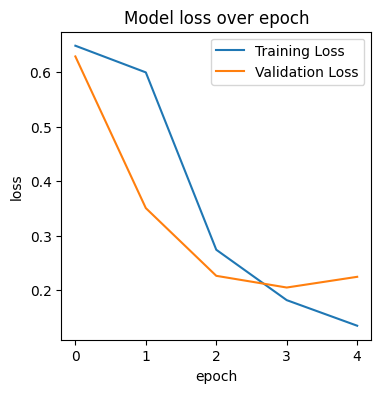

In [101]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.plot(lstm_history.history['loss'],label='Training Loss')
plt.plot(lstm_history.history['val_loss'],label= 'Validation Loss')
plt.title('Model loss over epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

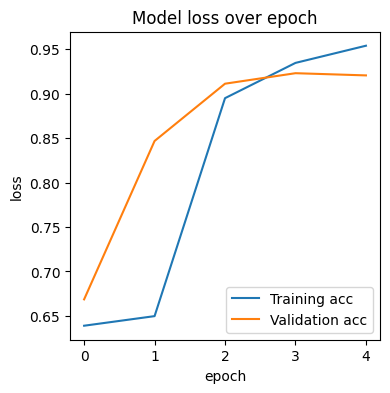

In [103]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.plot(lstm_history.history['accuracy'],label='Training acc')
plt.plot(lstm_history.history['val_accuracy'],label= 'Validation acc')
plt.title('Model loss over epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

**HYPERPARAMETER TUNING**

In [106]:
param_grid={
    'model_type':['rnn','lstm'],
    'embedding_dim':[64,128],
    'units':[32,64,128],
    'dropout_rate':[0.30,0.50],
    'learning_rate':[0.001,0.01]
}

#search space-> we have random search, gridsearch

for param, values in param_grid.items():
    print(f"{param}:{values}")



model_type:['rnn', 'lstm']
embedding_dim:[64, 128]
units:[32, 64, 128]
dropout_rate:[0.3, 0.5]
learning_rate:[0.001, 0.01]


In [118]:
total_combinations=1
for values in param_grid.values():
    print(values)
    print(len(values))


['rnn', 'lstm']
2
[64, 128]
2
[32, 64, 128]
3
[0.3, 0.5]
2
[0.001, 0.01]
2


In [122]:
for values in param_grid.values():
    total_combinations *= len(values)

total_combinations

48

In [124]:
#helper function
def create_mode_with_param(model_type='rnn',embedding_dim=128,units=64,dropout_rate=0.5,learning_rate=0.001):
  model=Sequential([
      Embedding(MAX_FEATURES,embedding_dim,input_length=MAX_LEN)
  ])

  if model_type == 'lstm':
    model.add(LSTM(units, return_sequences=False))
  else:
    model.add(SimpleRNN(units, return_sequences=False))

  model.add(Dropout(dropout_rate))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(
      optimizer = Adam(learning_rate=learning_rate),
      loss="binary_crossentropy",
      metrics=['accuracy']
  )
  return model

In [130]:
import time

def random_search(n_trails=8):
  results = []
  np.random.seed(42)
  for i in range(n_trails):
    params = {
        'model_type': str(np.random.choice(param_grid['model_type'])),
        'embedding_dim': int(np.random.choice(param_grid['embedding_dim'])),
        'units': int(np.random.choice(param_grid['units'])),
        'dropout_rate': float(np.random.choice(param_grid['dropout_rate'])),
        'learning_rate': float(np.random.choice(param_grid['learning_rate'])),
    }

    print(f"Trail {i+1}/{n_trails}")
    print(f"Parameters : {params}")
    try:
      model = create_mode_with_param(**params)
      history = model.fit(
            x_train, y_train,
            batch_size=128,
            epochs=10,  # idea
            validation_split=0.2,
            verbose=1
        )
      val_accuracy = max(history.history['val_accuracy'])
      results.append({
            'trail':i+1,
            'params':params,
            "val_accuracy":val_accuracy,
            "model":model
        })
      print(f"Validation Accuracy. : {val_accuracy}")
    except Exception as e:
      print(f"Error in the trial run {i+1}: {e}")
      continue

  return results

In [132]:
search_results = random_search(8)

Trail 1/8
Parameters : {'model_type': 'rnn', 'embedding_dim': 128, 'units': 32, 'dropout_rate': 0.3, 'learning_rate': 0.001}
Epoch 1/10


C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


821/821 ━━━━━━━━━━━━━━━━━━━━ 71s 76ms/step - accuracy: 0.5537 - loss: 0.6821 - val_accuracy: 0.6109 - val_loss: 0.6572
Epoch 2/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 81s 75ms/step - accuracy: 0.6242 - loss: 0.6479 - val_accuracy: 0.6560 - val_loss: 0.6288
Epoch 3/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 51s 61ms/step - accuracy: 0.6657 - loss: 0.5978 - val_accuracy: 0.5451 - val_loss: 0.6671
Epoch 4/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 124s 113ms/step - accuracy: 0.6305 - loss: 0.5684 - val_accuracy: 0.6036 - val_loss: 0.6685
Epoch 5/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 121s 86ms/step - accuracy: 0.6743 - loss: 0.5207 - val_accuracy: 0.6004 - val_loss: 0.7207
Epoch 6/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 76s 92ms/step - accuracy: 0.7087 - loss: 0.4874 - val_accuracy: 0.6157 - val_loss: 0.7405
Epoch 7/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 68s 74ms/step - accuracy: 0.7439 - loss: 0.4532 - val_accuracy: 0.6415 - val_loss: 0.7862
Epoch 8/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 86s 79ms/step - accuracy: 0.7865 - loss: 0.4144 - val_accu

In [136]:
#find the bestr para by myself

if search_results:
  best_result = max(search_results, key=lambda x:x['val_accuracy'])

  print(f"Random search results")
  for result in search_results:
    trial = result['trail']
    acc = result['val_accuracy']
    model_type = result['params']['model_type']
    print(f"Trail {trial}: {model_type.upper()} - Accuracy : {acc}\n")

  print(f"Trial : {best_result['trail']}")
  print(f"Parameters : {best_result['params']}") #finer rnn that i ran
  print(f"Validation Acc : {best_result['val_accuracy']}")

Random search results
Trail 1: RNN - Accuracy : 0.7513332366943359

Trail 2: LSTM - Accuracy : 0.9182919263839722

Trail 3: RNN - Accuracy : 0.5459012389183044

Trail 4: RNN - Accuracy : 0.8995504975318909

Trail 5: LSTM - Accuracy : 0.9068261384963989

Trail 6: LSTM - Accuracy : 0.9123876094818115

Trail 7: LSTM - Accuracy : 0.9113210439682007

Trail 8: RNN - Accuracy : 0.5524531602859497

Trial : 2
Parameters : {'model_type': 'lstm', 'embedding_dim': 64, 'units': 32, 'dropout_rate': 0.3, 'learning_rate': 0.01}
Validation Acc : 0.9182919263839722


In [152]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import pickle
#there are 3 ways to save the file
#pickle-> .pkl
# hdfs -> .h5 -> hdoop distributed file system
# keras-> .keras
#train my final best model
if search_results:
    best_params=best_result['params']


    # STEP-1creating the model
    best_model= create_mode_with_param(**best_params)

    #STEP-2 setup callbacks
    callbacks=[
        ModelCheckpoint(
            'C:/rnn handson/best_amazon_sentiment.keras',
            monitor='val_accuracy',
            save_best_only=True,
            mode='max',
            verbose=1),

        EarlyStopping(monitor='val_loss',
                     patience=3,
                     restore_best_weights=True)
    ]

    final_history = best_model.fit(
        x_train,y_train,
        batch_size=128,
        epochs=10,
        validation_split=0.20,
        callbacks=callbacks
    )

    #save the tokenizer
    with open(r'C:\rnn handson\best_amazon_sentiment.pkl', "wb") as f:
        pickle.dump(tokenizer, f)


else:
    print("Error")

Epoch 1/10


C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


821/821 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6722 - loss: 0.5531
Epoch 1: val_accuracy improved from -inf to 0.90279, saving model to C:/rnn handson/best_amazon_sentiment.keras
821/821 ━━━━━━━━━━━━━━━━━━━━ 66s 69ms/step - accuracy: 0.6724 - loss: 0.5529 - val_accuracy: 0.9028 - val_loss: 0.2410
Epoch 2/10
820/821 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9158 - loss: 0.2150
Epoch 2: val_accuracy improved from 0.90279 to 0.90991, saving model to C:/rnn handson/best_amazon_sentiment.keras
821/821 ━━━━━━━━━━━━━━━━━━━━ 54s 65ms/step - accuracy: 0.9158 - loss: 0.2150 - val_accuracy: 0.9099 - val_loss: 0.2247
Epoch 3/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9368 - loss: 0.1665
Epoch 3: val_accuracy improved from 0.90991 to 0.91658, saving model to C:/rnn handson/best_amazon_sentiment.keras
821/821 ━━━━━━━━━━━━━━━━━━━━ 52s 64ms/step - accuracy: 0.9368 - loss: 0.1665 - val_accuracy: 0.9166 - val_loss: 0.2389
Epoch 4/10
820/821 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/ste

In [154]:
from tensorflow.keras.models import load_model

#load the saved model and run as per the model
loaded_model= load_model('C:/rnn handson/best_amazon_sentiment.keras')
with open(r'C:\rnn handson\best_amazon_sentiment.pkl', "rb") as f:
    loaded_tokenizer= pickle.load(f)

In [158]:
y_pred_proba= loaded_model.predict(x_test)
y_pred= (y_pred_proba>0.5).astype(int).flatten()
y_pred

1026/1026 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step


array([0, 1, 1, ..., 0, 0, 1])

In [160]:
len(y_pred)

32815

In [164]:
from sklearn.metrics import *
test_accuracy=accuracy_score(y_test,y_pred)
print(f"test_accuracy : {test_accuracy}")

test_accuracy : 0.9158616486362944


In [170]:
def predict_sentiment(text):
  clean = clean_text(text)
  #convert to seq
  sequence = loaded_tokenizer.texts_to_sequences([clean]) #[] always the data has to be passed in a list
  #padding
  padded = pad_sequences(sequence, maxlen=MAX_LEN, padding='post')
  #predict
  prob = loaded_model.predict(padded, verbose=1)[0][0] #this i am not sure
  sentiment = "Positive" if prob > 0.5 else "Negative"
  return sentiment, prob

In [172]:
test_sentences = [
    "the packaging was nice but the product tested was not to my liking",
    "The product was excellent",
    "I expected my bluetooth headphones to be great but huge dissapointment... noooo bass and little highh!",
    "i have observed that the products that i have recieved are as per my preferences and requirements and i can not complain"
]

In [174]:
# test_sentences[1]
predict_sentiment(test_sentences[3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


('Negative', 0.036147717)

In [176]:
predict_sentiment(test_sentences[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


('Negative', 0.022100754)

In [178]:
predict_sentiment(test_sentences[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


('Positive', 0.9714978)

In [180]:
for i, sent in enumerate(test_sentences):
    print(f"{i}:{sent}")

0:the packaging was nice but the product tested was not to my liking
1:The product was excellent
2:I expected my bluetooth headphones to be great but huge dissapointment... noooo bass and little highh!
3:i have observed that the products that i have recieved are as per my preferences and requirements and i can not complain
